# This notebook include 3 main section:
- K_Means
- Hierarchical
- DBSCAN

### Importing needed library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.cm as cm
import pylab
from scipy.cluster import hierarchy 
from sklearn.cluster import DBSCAN

### Load Data From CSV File

In [2]:
df = pd.read_csv('Customer.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Convert type of Gender column from str to int

In [3]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### Check type of columns

In [4]:
df.dtypes

CustomerID                int64
Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

### Check size of dataset

In [5]:
df.shape

(200, 5)

### Check NaN exist in columns

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Normalizing over the standard deviation

In [7]:
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

## 1- K_Means

### K-Means Elbow Method

Running K-Means with a range of k

In [8]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(init = "k-means++", n_clusters=k, n_init = 12)
    kmeanModel.fit(Clus_dataSet)
    distortions.append(kmeanModel.inertia_)

Plotting the distortions of K-Means

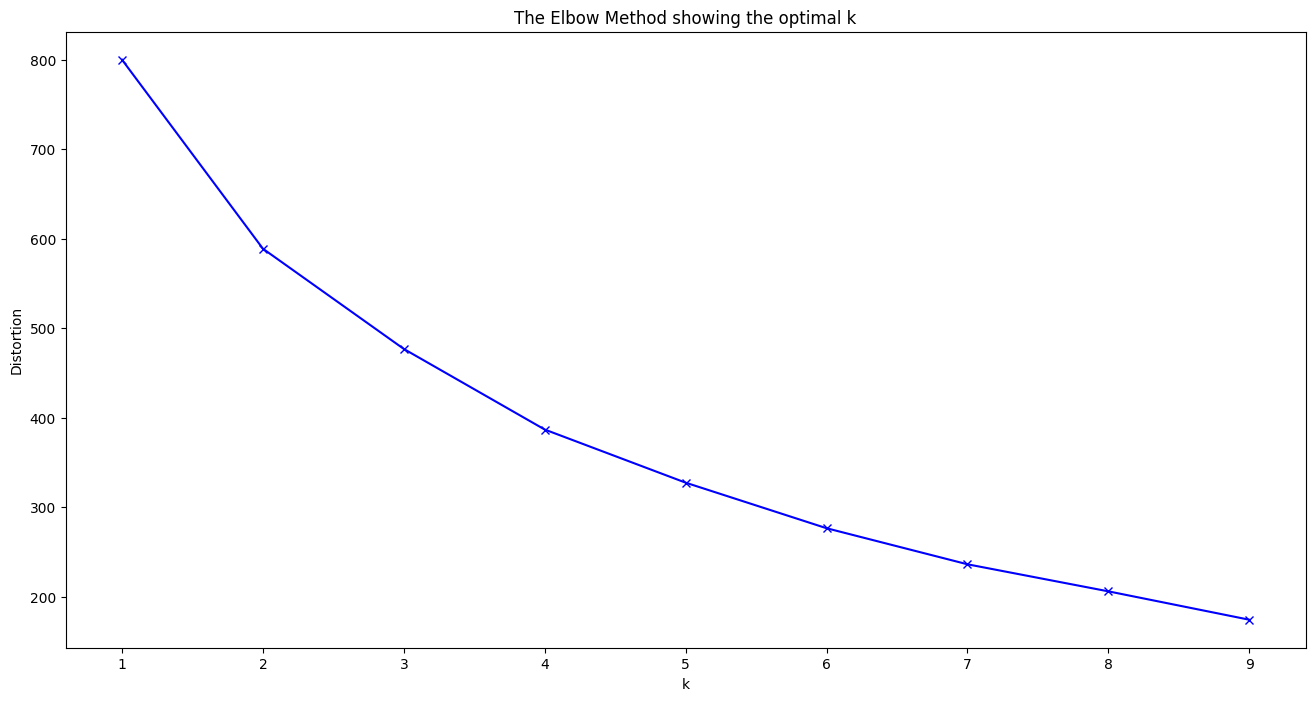

In [9]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Selecting the number of clusters with **silhouette_score()**

For n_clusters = 2 The average silhouette_score is : 0.4793049017423563
For n_clusters = 3 The average silhouette_score is : 0.3766801400675223
For n_clusters = 4 The average silhouette_score is : 0.42245261332521894
For n_clusters = 5 The average silhouette_score is : 0.41843870543486433
For n_clusters = 6 The average silhouette_score is : 0.409528091044574
For n_clusters = 7 The average silhouette_score is : 0.40882515853213164


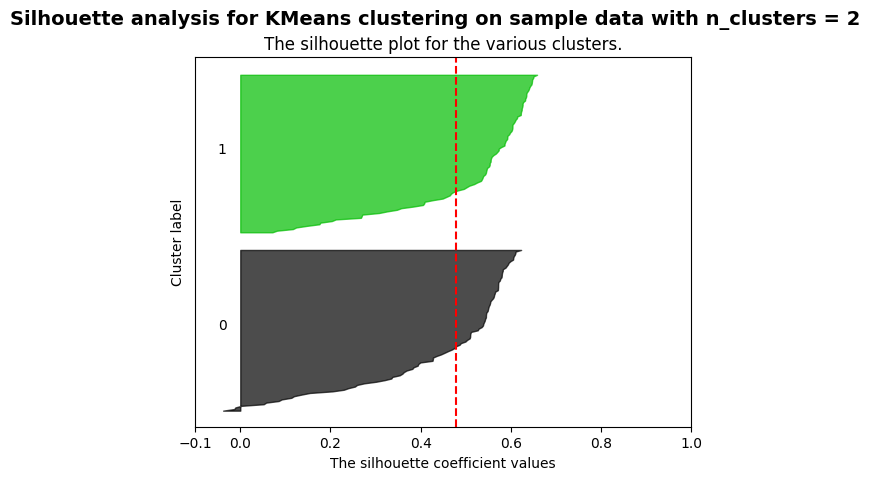

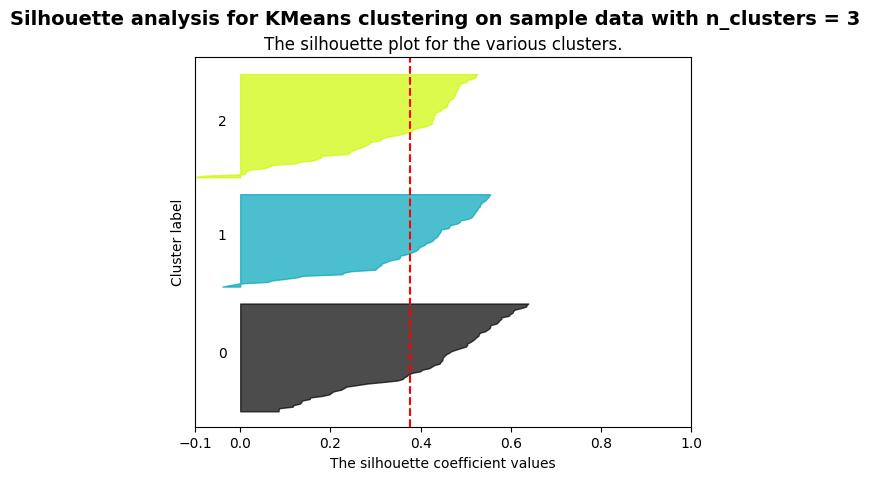

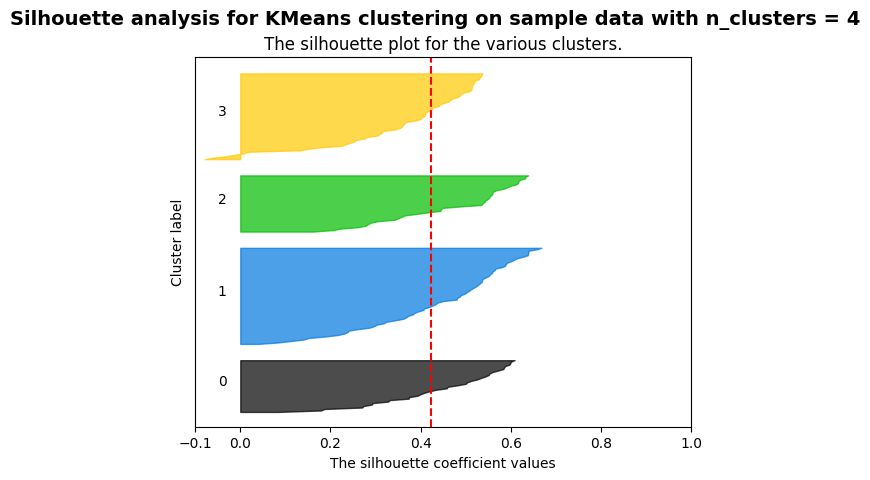

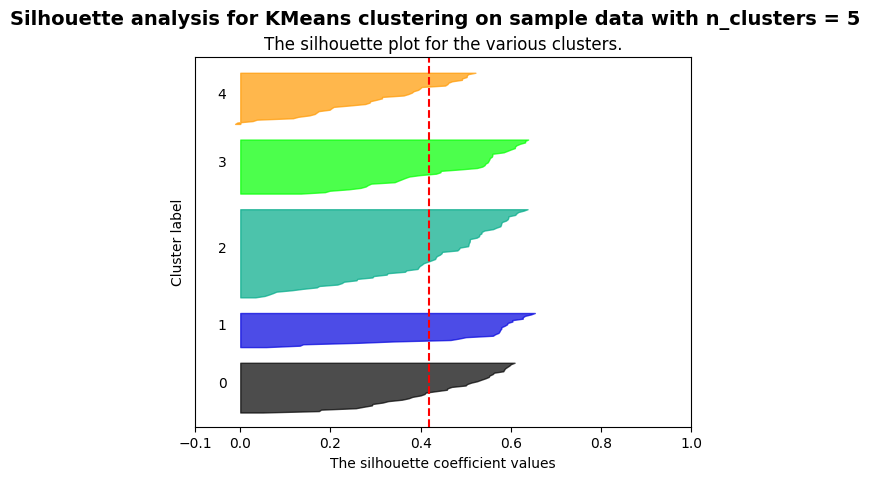

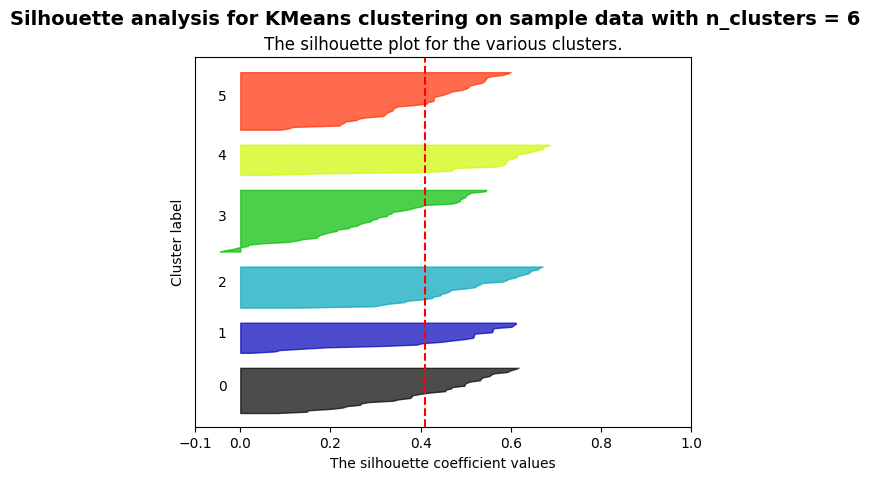

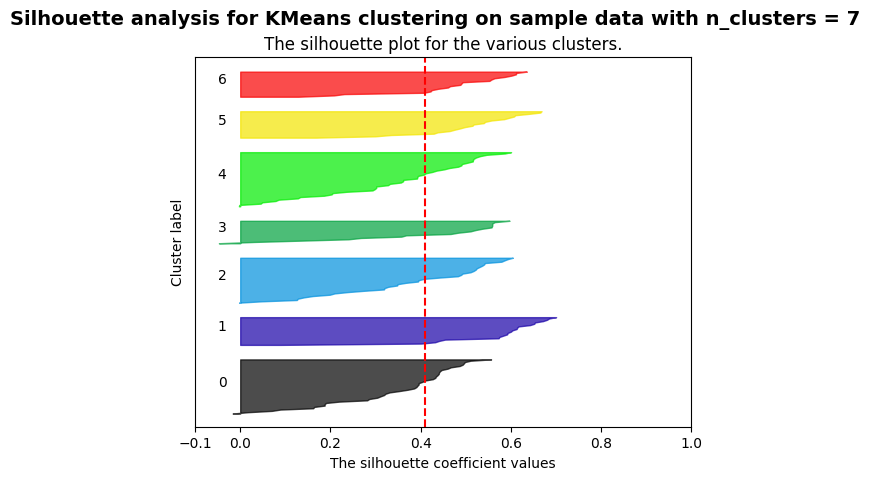

In [10]:
range_n_clusters = [i for i in range(2, 8)]
silh_score = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=3)
    cluster_labels = clusterer.fit_predict(df)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silh_score.append(silhouette_score(df, cluster_labels))
    silhouette_avg = silhouette_score(df, cluster_labels)
    print(f"For n_clusters = {n_clusters} The average silhouette_score is : {silhouette_avg}",)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0,ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.suptitle(f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {n_clusters}",
        fontsize=14,
        fontweight="bold",)

plt.show()

### Choose best n_clusters

In [11]:
result = list(zip(silh_score, range_n_clusters))
maximum = max(result)
max_n = maximum[1]

### Apply k-means on dataset, and take look at cluster labels.

In [12]:
k_means = KMeans(init = "k-means++", n_clusters = max_n, n_init = 12, random_state=3)
k_means.fit(Clus_dataSet)
labels = k_means.labels_
print(labels)

[1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


### Assign the labels to each row in dataframe

In [13]:
df["Clus_km"] = labels
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,0
3,4,0,23,16,77,1
4,5,0,31,17,40,1


### check the centroid values by averaging the features in each cluster

In [14]:
df.groupby('Clus_km').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Clus_km,,,,,
0,99.543689,0.466019,48.728155,60.495146,32.184466
1,101.515464,0.412371,28.360825,60.628866,69.329897


### Look at the distribution of customers based on their age and Spending Score

In [15]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Clus_km'],
      dtype='object')

C:\Users\sinad\AppData\Local\Temp\ipykernel_12732\1157346854.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 1], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.6)


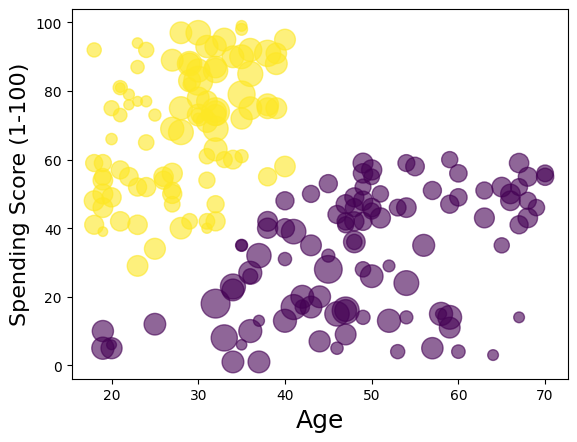

In [16]:
area = np.pi * ( X[:, 2])
plt.scatter(X[:, 1], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.6)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Spending Score (1-100)', fontsize=16)

plt.show()

## 2- Hierarchical

### Normalize the data frame with **MinMaxScaler()**

In [17]:
x = df.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.        , 1.        , 0.01923077, 0.        , 0.3877551 ,
        1.        ],
       [0.00502513, 1.        , 0.05769231, 0.        , 0.81632653,
        1.        ],
       [0.01005025, 0.        , 0.03846154, 0.00819672, 0.05102041,
        0.        ],
       [0.01507538, 0.        , 0.09615385, 0.00819672, 0.7755102 ,
        1.        ],
       [0.0201005 , 0.        , 0.25      , 0.01639344, 0.39795918,
        1.        ]])

In [18]:
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.43032315 1.45393544 ... 1.41345435 1.76022537 1.49877657]
 [0.43032315 0.         1.60815289 ... 1.35931186 1.85418832 1.42138915]
 [1.45393544 1.60815289 0.         ... 2.07554259 1.73838961 2.14895403]
 ...
 [1.41345435 1.35931186 2.07554259 ... 0.         1.15528585 0.13469899]
 [1.76022537 1.85418832 1.73838961 ... 1.15528585 0.         1.20059377]
 [1.49877657 1.42138915 2.14895403 ... 0.13469899 1.20059377 0.        ]]


In [19]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\sinad\AppData\Local\Temp\ipykernel_12732\1633147189.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


Plot the dendrogram

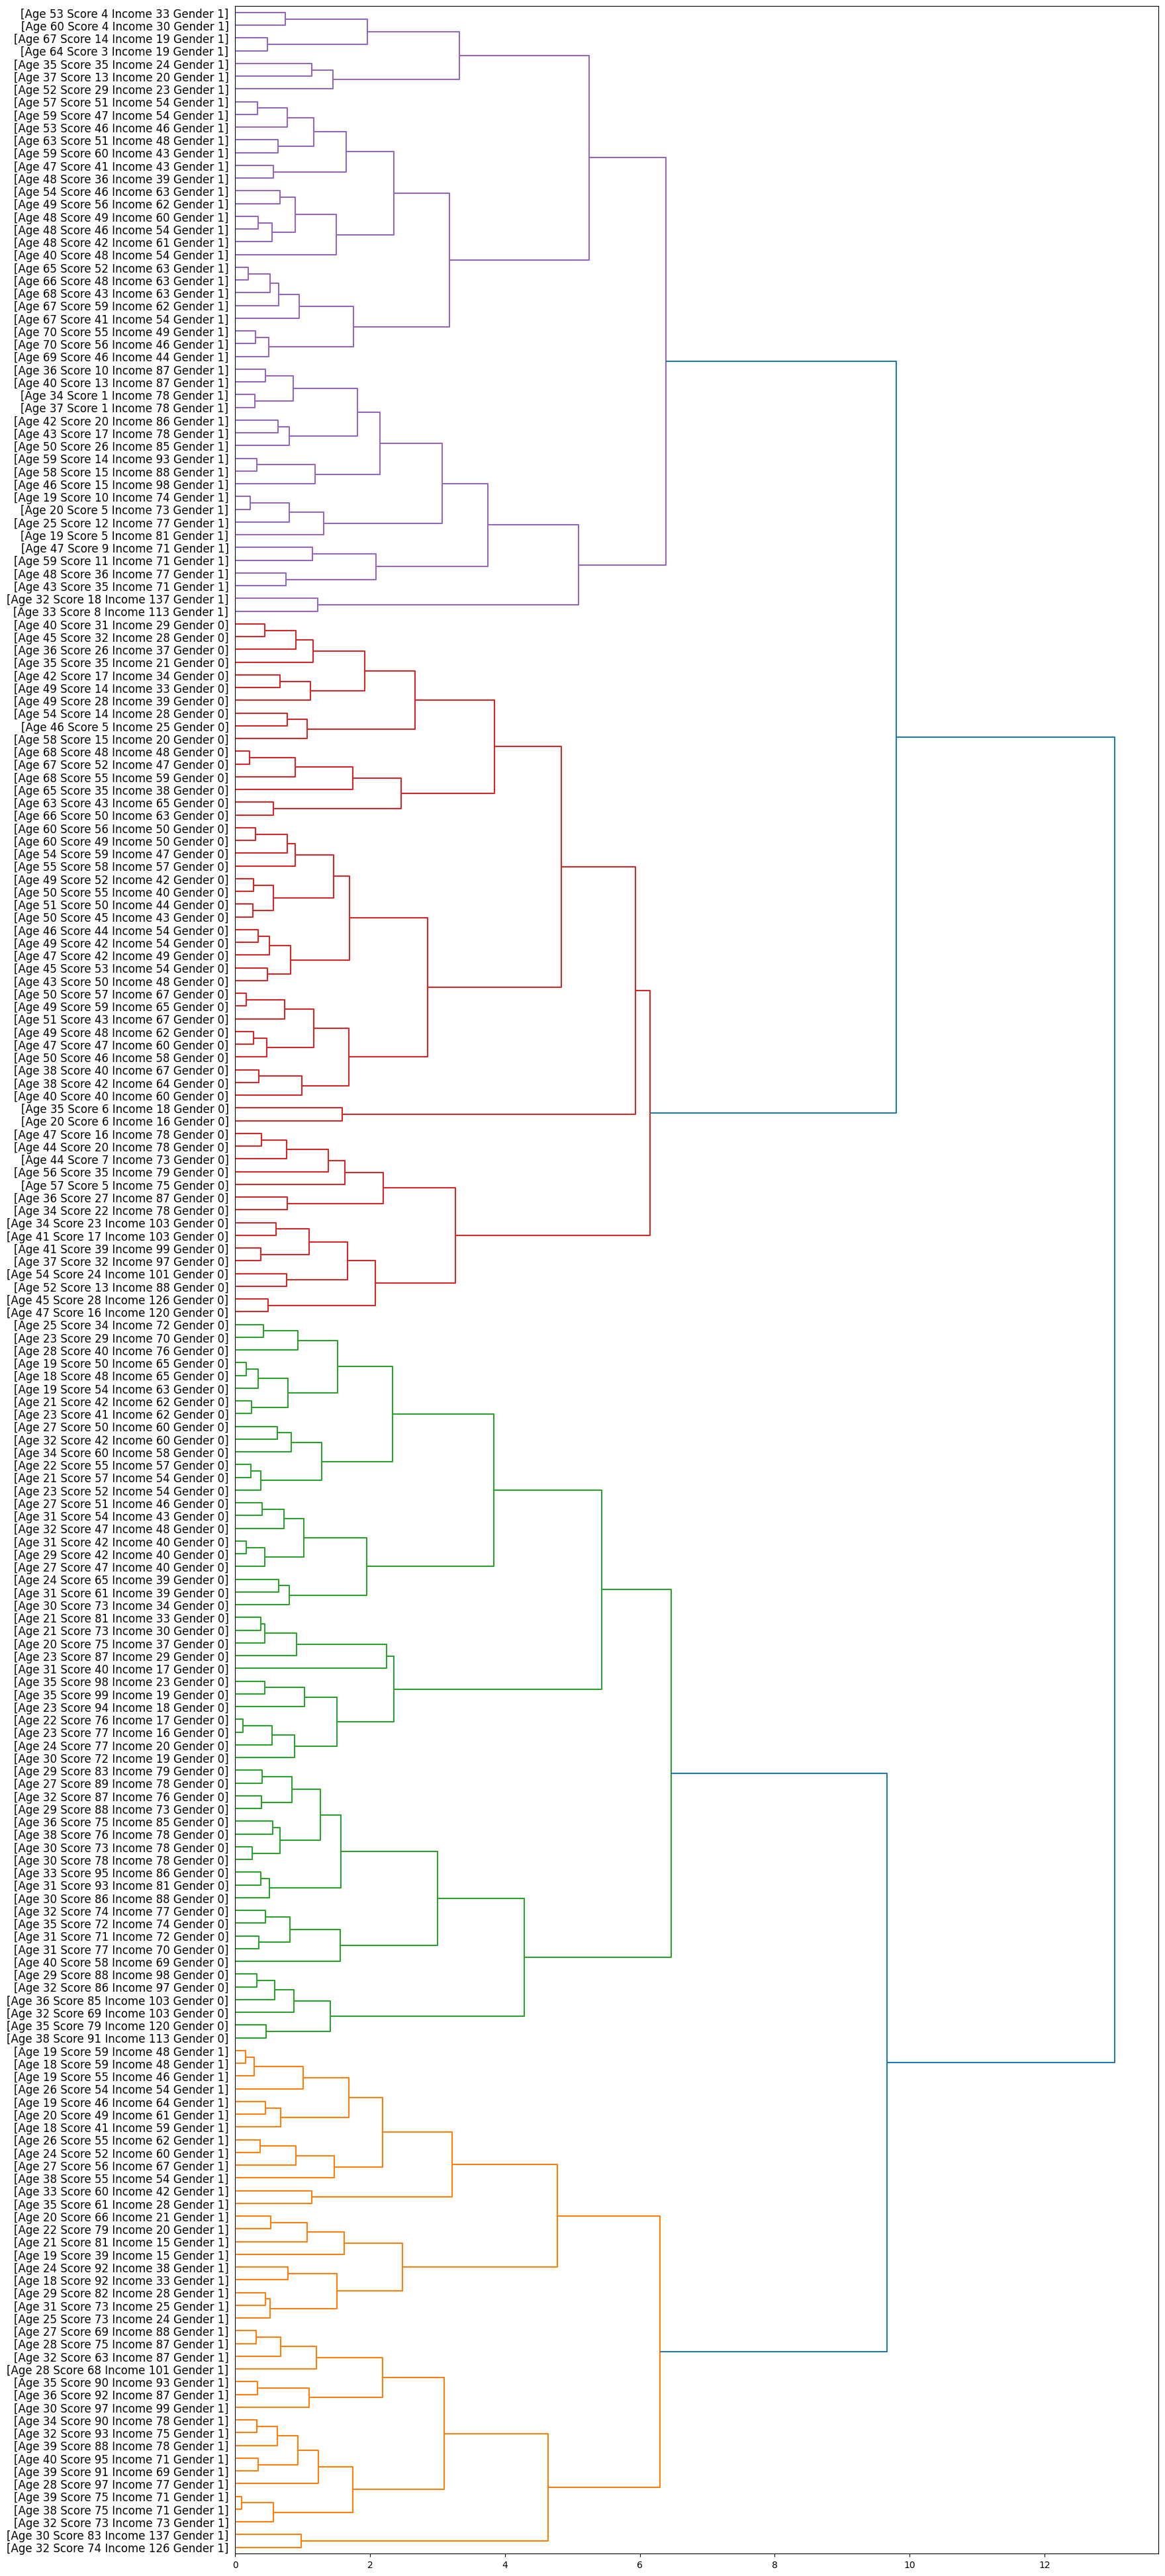

In [20]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[Age %s Score %s Income %s Gender %s]' % (df['Age'][id], df['Spending Score (1-100)'][id], df['Annual Income (k$)'][id], df['Gender'][id])
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

Evaluate the clustering models:

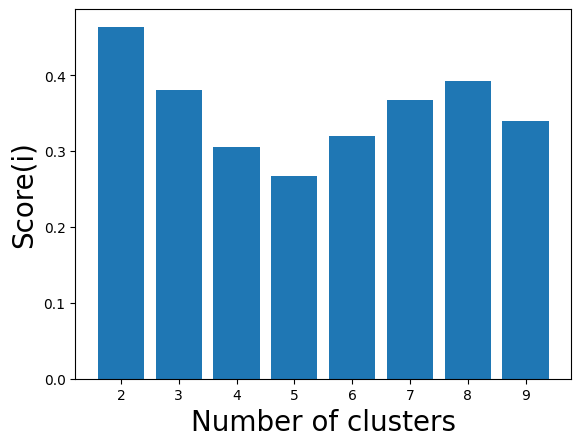

In [21]:
k = range(2,10)

ac_list = [AgglomerativeClustering(n_clusters = i, linkage = 'complete') for i in k]

# Appending the silhouette scores
silhouette_scores = {}
silhouette_scores.fromkeys(k)

for i,j in enumerate(k):
    silhouette_scores[j] = silhouette_score(df,
                        ac_list[i].fit_predict(df))

# Plotting
y = list(silhouette_scores.values())
plt.bar(k, y)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('Score(i)', fontsize = 20)
plt.show()

Choose best n_clusters

In [22]:
maxi = max(silhouette_scores.values())
def get_key(val):
    for key, value in silhouette_scores.items():
        if val == value:
            return key
value = get_key(maxi)
print(silhouette_scores)

{2: 0.4638742137895755, 3: 0.38007287892694036, 4: 0.30516587689695385, 5: 0.2670451701226759, 6: 0.3197561898788506, 7: 0.3671319357033109, 8: 0.3921435549658186, 9: 0.3397929790547052}


In [23]:
agglom = AgglomerativeClustering(n_clusters = value, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

c:\Users\sinad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:541: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

Add a new field to dataframe to show the cluster of each row

In [24]:
cdf = df.drop('Clus_km', axis=1)
cdf['cluster_'] = agglom.labels_
cdf.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,0
3,4,0,23,16,77,1
4,5,0,31,17,40,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


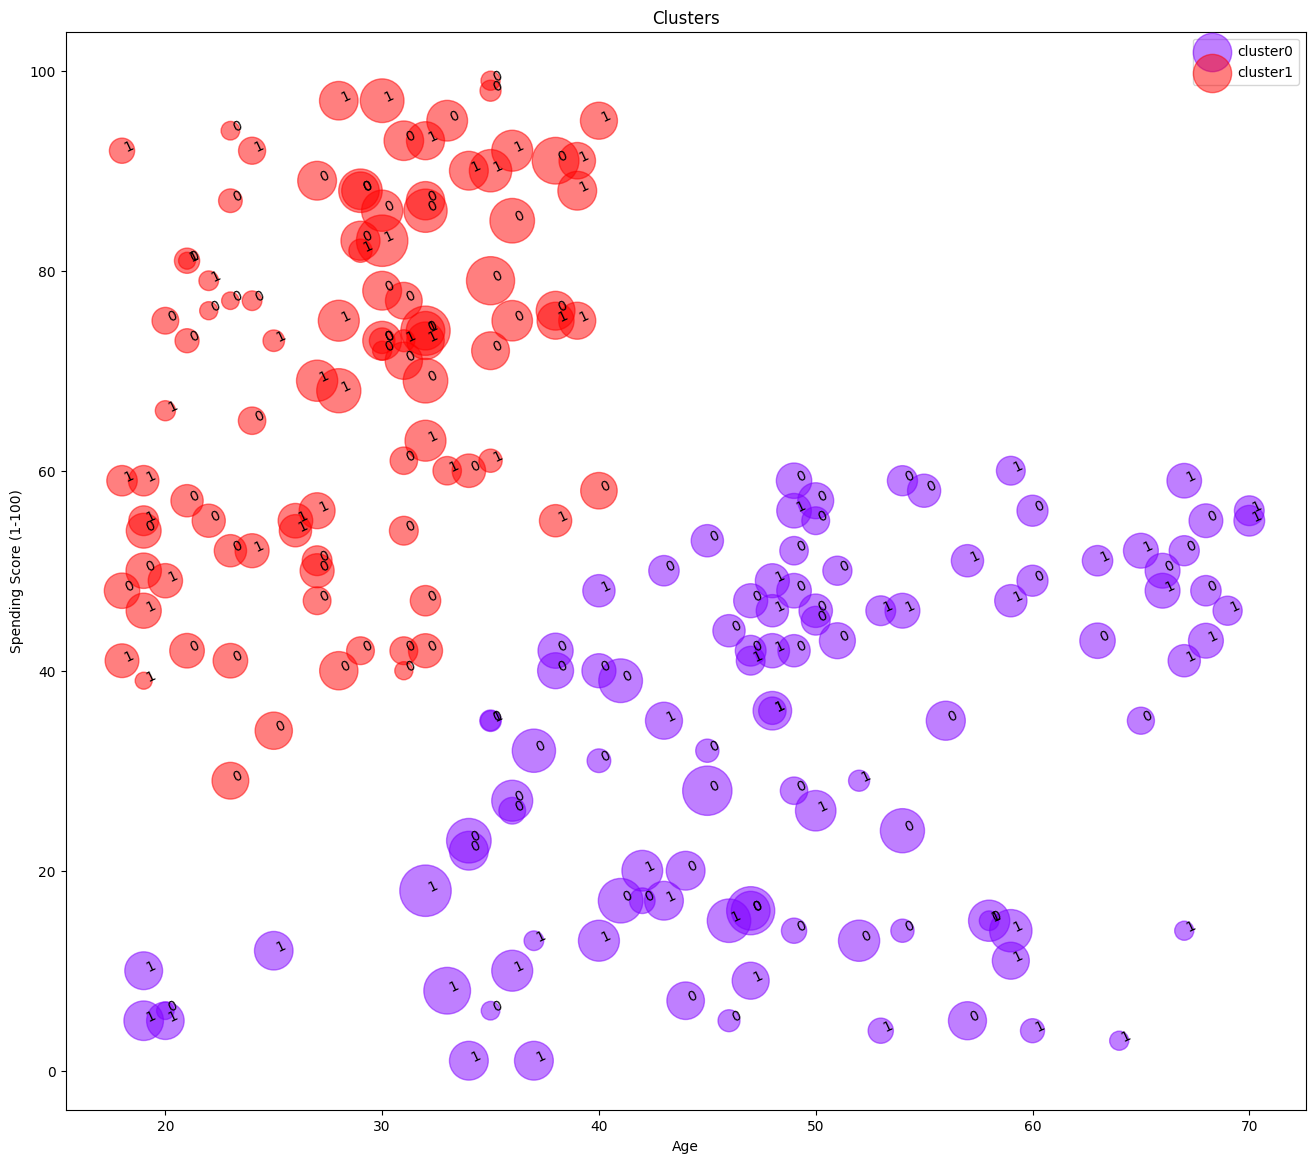

In [25]:
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = cdf[cdf.cluster_ == label]
    for i in subset.index:
            plt.text(subset.Age[i], subset['Spending Score (1-100)'][i], str(subset['Gender'][i]), rotation=25) 
    plt.scatter(subset.Age, subset['Spending Score (1-100)'], s= subset['Annual Income (k$)'] * 10, c=color, label='cluster'+str(label),alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [26]:
cdf.groupby(['cluster_','Gender'])['cluster_'].count()

cluster_  Gender
0         0         55
          1         48
1         0         57
          1         40
Name: cluster_, dtype: int64

Look at the characteristics of each cluster

In [27]:
agg_customer = cdf.groupby(['cluster_','Gender'])['Age','Annual Income (k$)','Spending Score (1-100)'].mean()
agg_customer

C:\Users\sinad\AppData\Local\Temp\ipykernel_12732\1907470915.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_customer = cdf.groupby(['cluster_','Gender'])['Age','Annual Income (k$)','Spending Score (1-100)'].mean()


Age  Annual Income (k$)  Spending Score (1-100)
cluster_ Gender                                                       
0        0       48.109091           58.818182               34.781818
         1       49.437500           62.416667               29.208333
1        0       28.438596           59.666667               67.684211
         1       28.250000           62.000000               71.675000

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


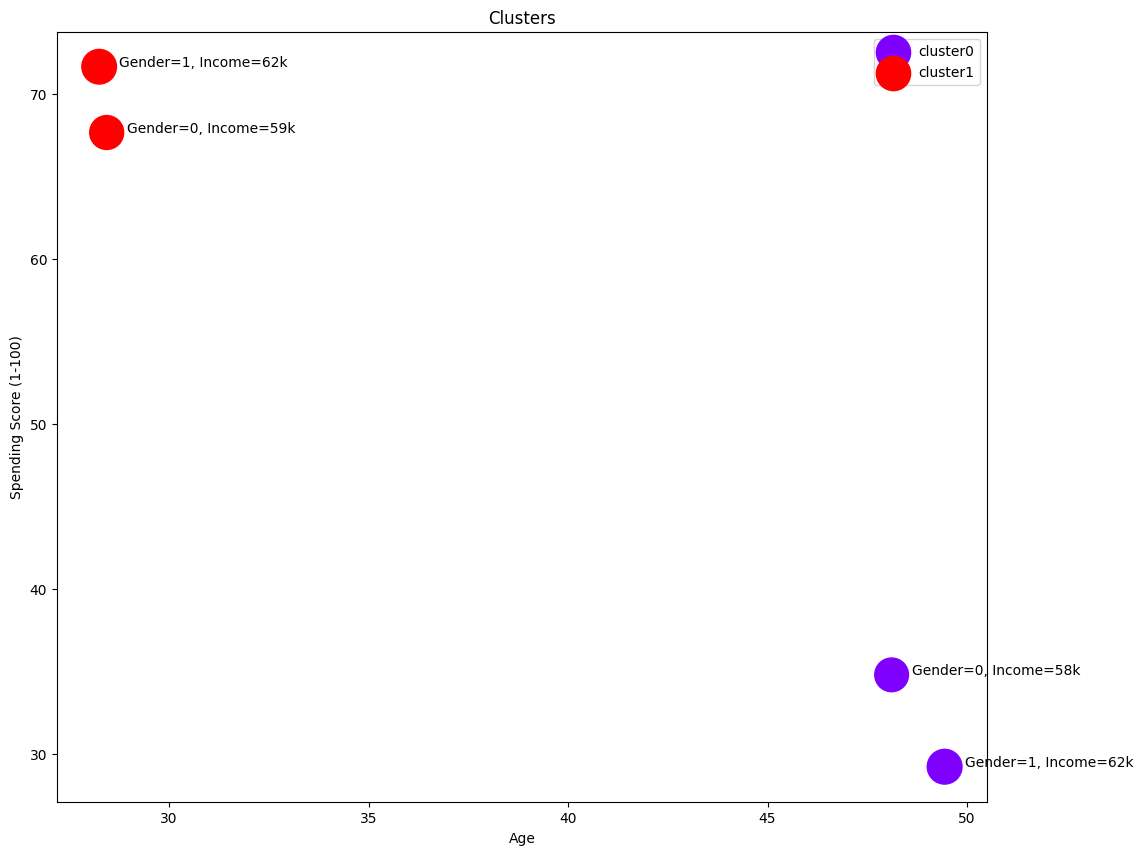

In [28]:
plt.figure(figsize=(12,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_customer.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+.5, subset.loc[i][2], 'Gender='+str(int(i)) + ', Income='+str(int(subset.loc[i][1]))+'k')
    plt.scatter(subset.Age, subset['Spending Score (1-100)'], s=subset['Annual Income (k$)']*10, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

## 3- DBSCAN

In [29]:
pdf = df.drop(['Clus_km'], axis=1)

In [30]:
pdf.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [31]:
Clus_dataSet = pdf[['Annual Income (k$)',
       'Spending Score (1-100)']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

In [32]:
range_n_clusters = [i for i in range(2, 31)]
silh_score = []
for n_clusters in range_n_clusters:
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=3)
    cluster_labels = clusterer.fit_predict(Clus_dataSet)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silh_score.append(silhouette_score(Clus_dataSet, cluster_labels))
    silhouette_avg = silhouette_score(Clus_dataSet, cluster_labels)
    # print(f"For n_clusters = {n_clusters} The average silhouette_score is : {silhouette_avg}",)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Clus_dataSet, cluster_labels)

In [33]:
result = list(zip(silh_score, range_n_clusters))
maximum = max(result)
max_n = maximum[1]
maximum

(0.5546571631111091, 5)

In [34]:
from sklearn.neighbors import NearestNeighbors
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(Clus_dataSet) # fitting the data to the object
distances,indices=nbrs.kneighbors(Clus_dataSet) # finding the nearest neighbours

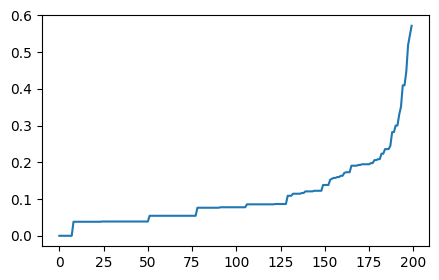

In [35]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

0.19475560751504128


<Figure size 500x500 with 0 Axes>

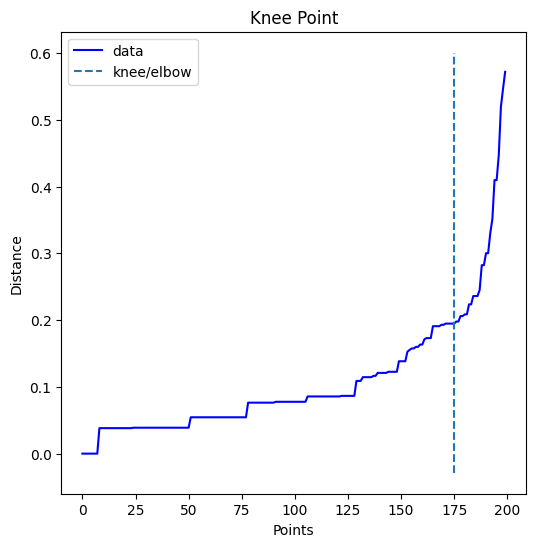

In [36]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [37]:
min_sample = [i for i in np.arange(1, 13)]
for i in min_sample:
    print("min_sample value is "+str(i))
    db = DBSCAN(eps= distances[knee.knee], min_samples= i).fit(Clus_dataSet)
    core_samples_mask = np.zeros_like(db.labels_, dtype= bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = set([label for label in db.labels_ if label >= 0])
    print(set(labels))
    print("For min_samples value ="+str(i), "Total no. of clusters are "+ str(len(set(labels))), '\n')

min_sample value is 1
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48}
For min_samples value =1 Total no. of clusters are 49 

min_sample value is 2
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}
For min_samples value =2 Total no. of clusters are 25 

min_sample value is 3
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}
For min_samples value =3 Total no. of clusters are 12 

min_sample value is 4
{0, 1, 2, 3, 4, 5, 6}
For min_samples value =4 Total no. of clusters are 7 

min_sample value is 5
{0, 1, 2, 3, 4, 5}
For min_samples value =5 Total no. of clusters are 6 

min_sample value is 6
{0, 1, 2, 3}
For min_samples value =6 Total no. of clusters are 4 

min_sample value is 7
{0, 1, 2}
For min_samples value =7 Total no. of clusters are 3 

min_sample value is 8
{0, 1}
For min_samples value =8 Total no. of clusters a

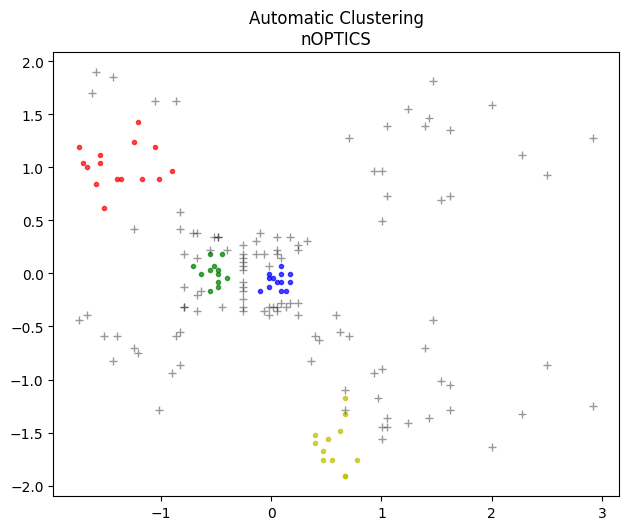

In [38]:
from sklearn.cluster import OPTICS
import matplotlib.gridspec

clust = OPTICS(min_samples = 6, xi= .05, min_cluster_size= .05)
# Run the fit
clust.fit(Clus_dataSet)
plt.figure(figsize= (18, 10))
G = matplotlib.gridspec.GridSpec(2, 3)
ax2 = plt.subplot(G[1, 0])

# OPTICS Algorithm to find the automated clusters
colors = ['g.', 'b.', 'r.', 'y.']
for klass, color in zip(range(0, 4), colors):
    x_clusters = Clus_dataSet[clust.labels_ == klass]
    ax2.plot(x_clusters[:, 0], x_clusters[:, 1], color, alpha= 0.7)
ax2.plot(Clus_dataSet[clust.labels_ == -1, 0], Clus_dataSet[clust.labels_ == -1, 1], 'k+', alpha= 0.4)
ax2.set_title('Automatic Clustering\nnOPTICS')

plt.tight_layout()
plt.show()

In [39]:
# Compute DBSCAN
db = DBSCAN(eps = distances[knee.knee], min_samples= 6).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf['Clus_db'] = labels
print(set(labels))

n_clusters_ = len(set(labels))
n_noise_ = list(labels).count(-1)

print(f"Estimate number of clusters is: {n_clusters_}")
print(f"Estimate number of noise points is: {n_noise_}")

{0, 1, 2, 3, -1}
Estimate number of clusters is: 5
Estimate number of noise points is: 98


In [40]:
pdf.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_db
0,1,1,19,15,39,-1
1,2,1,21,15,81,-1
2,3,0,20,16,6,-1
3,4,0,23,16,77,-1
4,5,0,31,17,40,-1


In [41]:
unique_labels = set(labels)

In [42]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

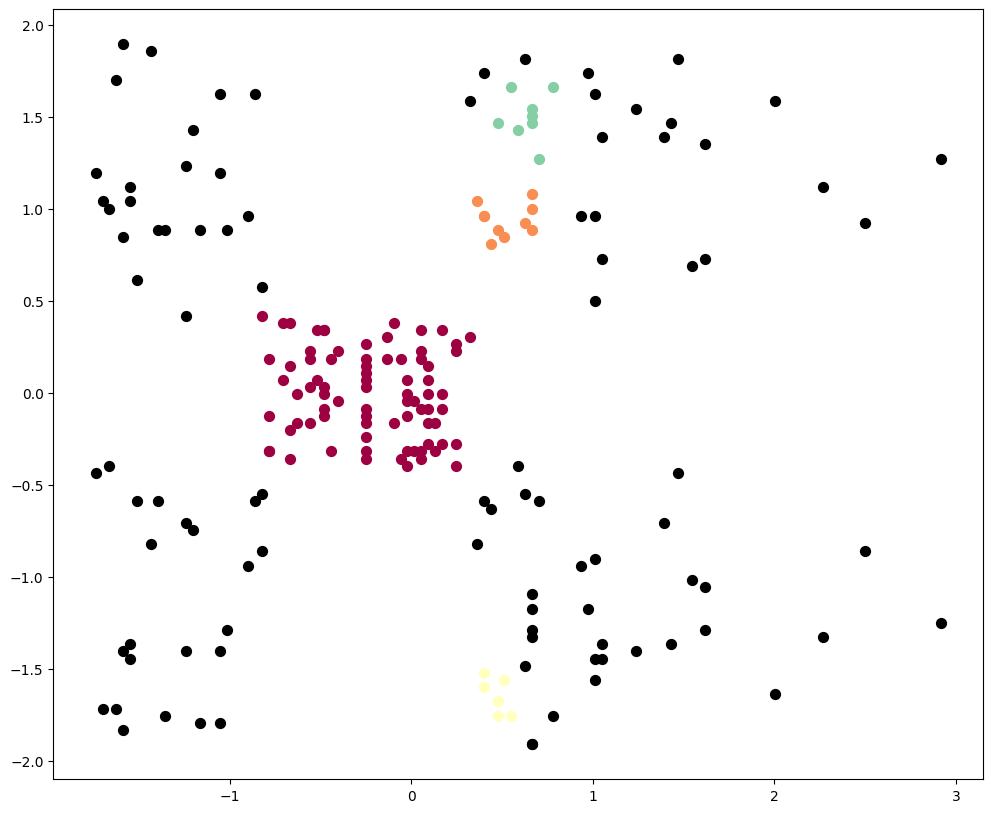

In [43]:
# Plot the points with colors
plt.figure(figsize =(12, 10))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = Clus_dataSet[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o')

    # Plot the outliers
    xy = Clus_dataSet[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o')